In [1]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 56.9 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import time
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from tqdm import tqdm
import gc

In [3]:
from statsmodels_regression import *
from enhanced_linear_regression import *

In [4]:
repetitions=10

## Prep data

In [5]:
sample_size = []    
stats_model=[]
wrapper_statsmodel = []
sklearn_lr = []
enhanced_model = []
# Test up to a million 
for sample_ in tqdm(range(10000,110000,10000)):
    for i in range(repetitions):
        sample_size.append(sample_)


    # Preping Dataset
    X, y, real_coef = make_regression(n_samples=sample_, n_features=25, n_informative=5, bias=0.3, noise=0.2, coef=True, random_state=42)
    X2 = sm.add_constant(X)
    n=["X_" + str(i+1) for i in range(0,X.shape[1])]
    X_named = pd.DataFrame(X, columns=n)

    # Test statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        est = sm.OLS(y, X2)
        est2 = est.fit()
        taken_time = time.time()-starttime
        del est, est2
        stats_model.append(taken_time)
    #stats_model.append(np.mean(temp))

    # Wrapper statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm = statsmodels_regression(add_constant=True)
        lm.fit(X_named,y)
        taken_time = time.time()-starttime
        del lm
        wrapper_statsmodel.append(taken_time)
    #wrapper_statsmodel.append(np.mean(temp))

    # Statsmodel
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm=LinearRegression(n_jobs=1, fit_intercept=True)
        lm.fit(X,y)
        taken_time = time.time()-starttime
        del lm
        sklearn_lr.append(taken_time)
    #sklearn_lr.append(np.mean(temp))

    # Enhanced sklearn ## our solution
    #temp = []
    for i in range(repetitions):
        starttime = time.time()
        lm=EnhancedLinearRegression(n_jobs=1, fit_intercept=True)
        lm.fit(X_named,y)
        taken_time = time.time()-starttime
        enhanced_model.append(taken_time)
        del lm
    #enhanced_model.append(np.mean(temp))

100%|██████████| 10/10 [02:38<00:00, 15.84s/it]


In [6]:
results = pd.DataFrame(np.array([sample_size, stats_model, wrapper_statsmodel, sklearn_lr, enhanced_model]).T, columns=["Sample size", "Statsmodel", "Wrapper Statsmodel", "Sklearn", "Enhanced Sklearn"])

In [7]:
print(results)

    Sample size  Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
0       10000.0    0.095258            0.039568  0.008508          0.010688
1       10000.0    0.018892            0.041024  0.002532          0.004829
2       10000.0    0.018156            0.024260  0.001881          0.004205
3       10000.0    0.019067            0.024072  0.001702          0.003592
4       10000.0    0.018156            0.024285  0.001800          0.004183
..          ...         ...                 ...       ...               ...
95     100000.0    2.430689            2.448615  0.054964          0.078045
96     100000.0    1.921948            2.012038  0.040414          0.055907
97     100000.0    1.797004            1.956356  0.040571          0.060546
98     100000.0    1.982307            2.045469  0.040807          0.061593
99     100000.0    2.860345            2.657952  0.040474          0.050622

[100 rows x 5 columns]


In [8]:
print(results.describe())

         Sample size  Statsmodel  Wrapper Statsmodel     Sklearn  \
count     100.000000  100.000000          100.000000  100.000000   
mean    55000.000000    0.704373            0.778957    0.027064   
std     28867.513459    1.225586            1.180211    0.035232   
min     10000.000000    0.017415            0.024072    0.001129   
25%     30000.000000    0.057342            0.059005    0.003290   
50%     55000.000000    0.098488            0.102218    0.007807   
75%     80000.000000    0.641794            1.493497    0.040836   
max    100000.000000    5.267200            4.326667    0.144157   

       Enhanced Sklearn  
count        100.000000  
mean           0.035170  
std            0.046913  
min            0.003592  
25%            0.006047  
50%            0.009041  
75%            0.058896  
max            0.200173  


In [9]:
print(results.groupby("Sample size").mean())

             Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
Sample size                                                            
10000.0        0.026111            0.027938  0.002419          0.004878
20000.0        0.037539            0.050990  0.002344          0.004843
30000.0        0.058952            0.058944  0.003407          0.006096
40000.0        0.078372            0.078978  0.004147          0.006415
50000.0        0.082780            0.106821  0.011049          0.006739
60000.0        0.105895            0.100857  0.006953          0.010012
70000.0        0.116727            0.169091  0.017402          0.019432
80000.0        0.725755            3.048893  0.088428          0.098770
90000.0        3.686163            1.879982  0.084611          0.136837
100000.0       2.125440            2.267081  0.049880          0.057679


In [10]:
print(results.groupby("Sample size").std())

             Statsmodel  Wrapper Statsmodel   Sklearn  Enhanced Sklearn
Sample size                                                            
10000.0        0.024309            0.006600  0.002167          0.002067
20000.0        0.004922            0.003286  0.000390          0.000478
30000.0        0.009042            0.003311  0.000756          0.000847
40000.0        0.007872            0.003785  0.001346          0.000168
50000.0        0.007058            0.004397  0.004229          0.000677
60000.0        0.009461            0.006730  0.001182          0.001725
70000.0        0.013118            0.047110  0.007943          0.008627
80000.0        0.190525            1.237583  0.032348          0.019250
90000.0        0.974439            0.630041  0.017086          0.036399
100000.0       0.545894            0.310187  0.019679          0.010619


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

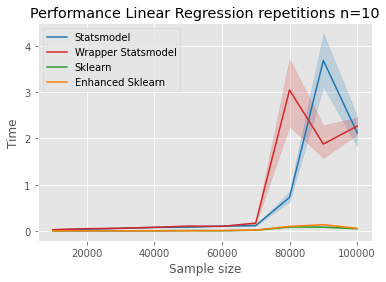

In [12]:
for name, color in zip(["Statsmodel", "Wrapper Statsmodel", "Sklearn", "Enhanced Sklearn"], ["tab:blue", "tab:red", "tab:green", "tab:orange"]):
    sns.lineplot(x=results["Sample size"], y=results[name], label=name, color=color)
plt.ylabel("Time")
plt.title("Performance Linear Regression repetitions n="+str(repetitions))
plt.show()